In [8]:
from dataviz import data_slice,data_timeplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

# Entrainement modèle prophet

In [41]:
from fbprophet import Prophet
import numpy as np



In [3]:

X_train=pd.read_csv('training_input_qFI2jug.csv', index_col="Horodate_UTC",parse_dates=['Horodate_UTC'],dayfirst=True)
feature_list=list(X_train.columns[3:])
#X_train['timestamp']=pd.to_datetime(X_train.index)
X_train.index = pd.DatetimeIndex(X_train.index)

liste_dates = X_train.index.tolist()
for dt in liste_dates :
    X_train.at[dt, 'sort'] = dt.strftime('%m%d%H%S')

X_train['sort'].astype(int)

df_month = X_train.sort_values(by='sort', ascending=True)
df_month.head(20)
df_month = df_month.interpolate(str="linear", axis=0).ffill().bfill()
df = df_month.sort_values(by='IDS', ascending=True)

X_train.drop('sort', axis=1)

X_train['Pseudo rayonnement'] = df['Pseudo rayonnement']
X_train['timestamp']=pd.to_datetime(X_train.index)

In [4]:
X_test=pd.read_csv('testing_input_BcjTmnd.csv',index_col="Horodate_UTC",parse_dates=['Horodate_UTC'],dayfirst=True)
#X_test['timestamp']=pd.to_datetime(X_test.index)
X_test.index = pd.DatetimeIndex(X_test.index)

X_test['timestamp']=pd.to_datetime(X_test.index)

In [5]:
y_train=pd.read_csv('training_output_uamzSZW.csv',index_col="Horodate_UTC",parse_dates=['Horodate_UTC'],dayfirst=True)
#y_train['timestamp']=pd.to_datetime(y_train.index)
y_train.index = pd.DatetimeIndex(y_train.index)

y_train['timestamp']=pd.to_datetime(y_train.index)

In [10]:
y_RES1_BASE=y_train.rename(columns={'RES1_BASE':'y'})
y_RES1_BASE['ds']=y_RES1_BASE.index
prophet=Prophet()
prophet.fit(y_RES1_BASE.loc[:date(2017,4,30)])


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


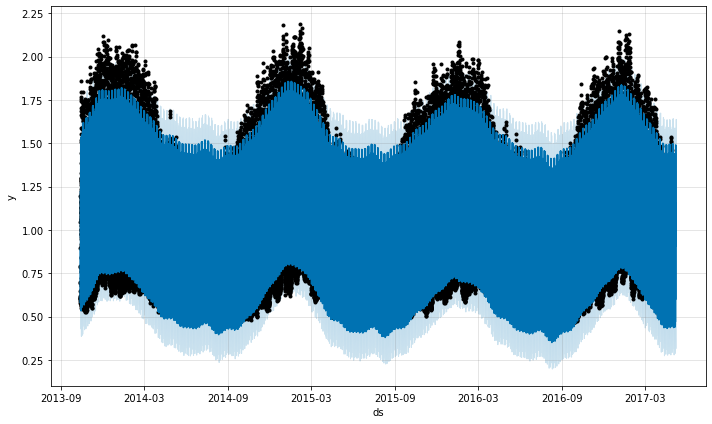

In [17]:
m=prophet
future = m.make_future_dataframe(periods=7*48, freq = '30T')
forecast = m.predict(future)
fig = m.plot(forecast)

In [12]:
forecast.shape

(62165, 22)

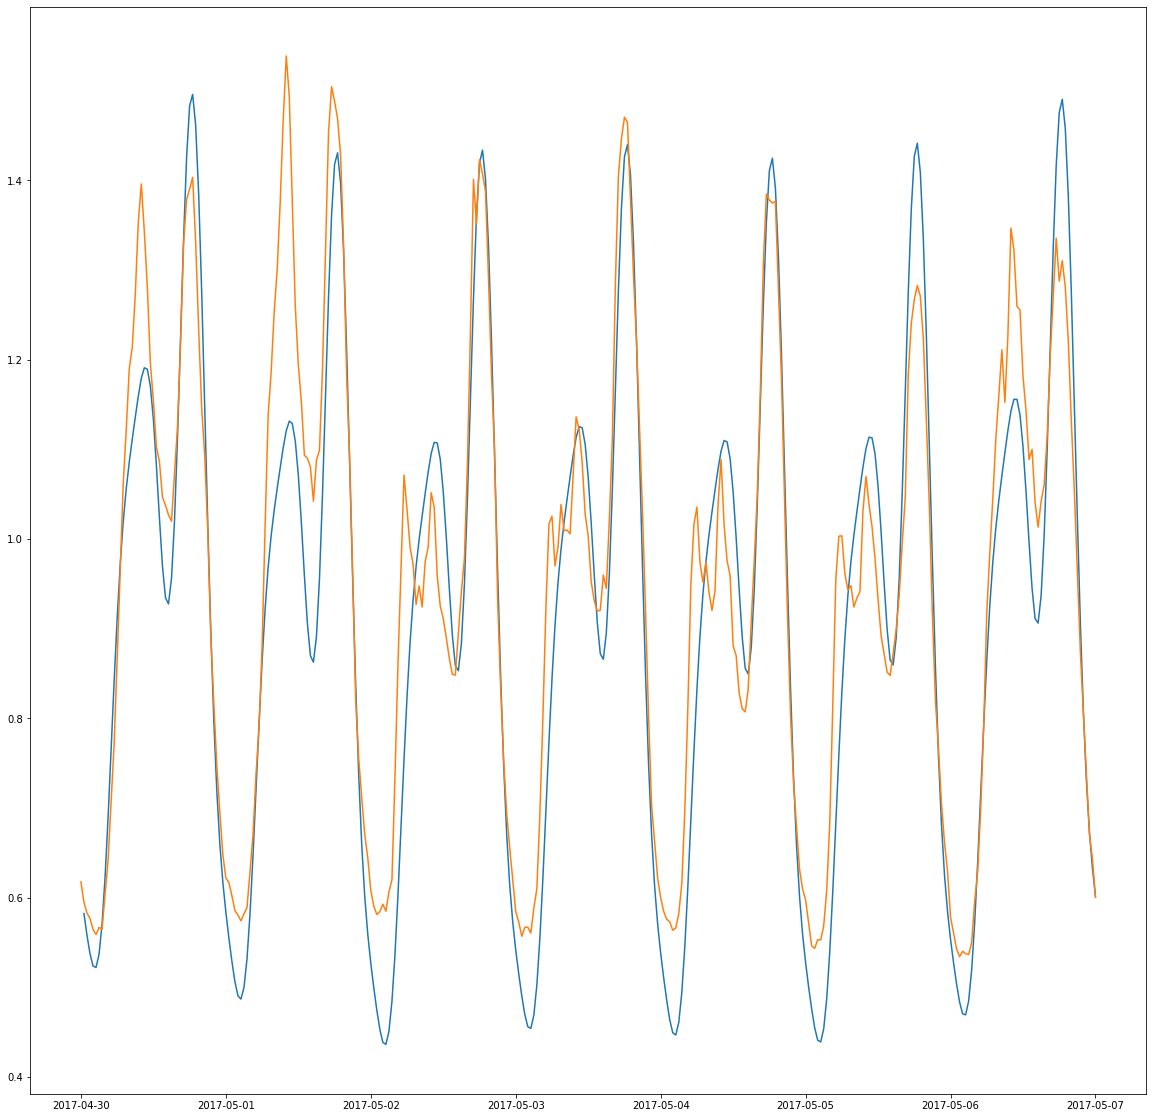

In [34]:
fig=plt.figure(figsize=(20,20))
id_max=forecast.shape[0]
plt.plot_date(forecast.iloc[id_max-7*48:id_max]['ds'],forecast.iloc[id_max-7*48:id_max]['yhat'],linestyle='-',marker=None)
plt.plot_date(y_train.loc[date(2017,4,30):date(2017,5,7)].index,y_train.loc[date(2017,4,30):date(2017,5,7)]['RES1_BASE'],linestyle='-',marker=None)
#plt.axvline(x=date(2017,4,30),color='green')

In [35]:
from statsmodels.tools.eval_measures import rmse

In [56]:
print('RMSE',rmse(forecast.iloc[id_max-(7*48+1):id_max]['yhat'],y_train.loc[date(2017,4,30):date(2017,5,7)]['RES1_BASE']))

print('MAPE %0.2f%%' % np.abs(100*(np.array(forecast.iloc[id_max-(7*48+1):id_max]['yhat'])-np.array(y_train.loc[date(2017,4,30):date(2017,5,7)]['RES1_BASE']))
                    /np.array(y_train.loc[date(2017,4,30):date(2017,5,7)]['RES1_BASE'])).mean())

RMSE 0.10888310755309405
MAPE 9.03%
